In [1]:
#Study case: Census income prediction
#The prediction task is to determine whether a person makes over $50K a year.

#importing libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost


In [3]:
!pip install plotly


In [4]:
#import all libraries i may use (almost all libraries i normally use but in this case, we won't need the regression algorithm)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import plotly.graph_objs as go
import plotly.offline as py



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost
from xgboost import XGBClassifier


import os
import itertools
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
#alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.linear_model import  LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
#from keras.models import Sequential,model_from_json
#from keras.layers import Dense
#from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

%matplotlib inline

from scipy.stats import skew
from sklearn import preprocessing
import time
import pickle


from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error
import sklearn.metrics
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [5]:
#Getting the Data
df = pd.read_csv("Dataa.csv")

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


As a first view:

We can see a lot of features that need conversion into numeric such as Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country and Income for our training and testing set.

Then, we also need to scale the data as we have features with different ranges. We will hadle it later.

We also need to manage missing vales and also NAN values. Then, start checking if we have any missing/ NAN values:

In [7]:
df.isnull().sum().sort_values(ascending=False)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing data! Fantastic!

In [8]:
#Data Exploration/Analysis
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we mentioned earlier, 
We  need to convert all object type of features into numeric such as Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country and Income for our training and testing set.

And if we check the above tabel:
The data-set has 32560  examples non null values and 14 features plus the target category variable (Income). 6 of the features are integers and 9 are objects. 

In [9]:
#Now let's check the unique values just to make sure that we we do not have features with only one single value that we will need to drop too from my data:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
#just checking the issing values so that we are assure that we have no more missing values:
#although there is no missing values, let's see if the following code works:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,0,0.0
Workclass,0,0.0
Fnlwgt,0,0.0
Education,0,0.0
Education_num,0,0.0


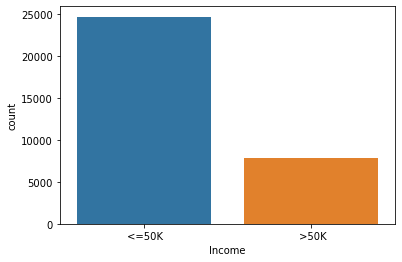

In [11]:
sns.countplot(df['Income']) #we see an imbalance on our target:

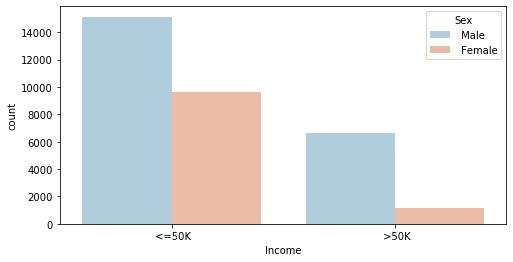

In [12]:
#Let's check how many instances of income are below 50k and how many are above 50k
#and at the same time, split these instances by Sex
#So basically we will see the number of incomes differenting the amount of income and by Sex:
plt.figure(figsize=(8,4))
sns.countplot(x='Income',hue='Sex',data=df,palette='RdBu_r')

Firstly, We can see in the above plotting is that we have more incomes below 50k than above 50k.

Secondly, we can notice Males are more likely to have more of both cases, to have both type of incomes compared with Females.

Lastly, we can analyze and inform that Males and Females, both are more likely to have incomes lower than 50k than higer than 50k. 

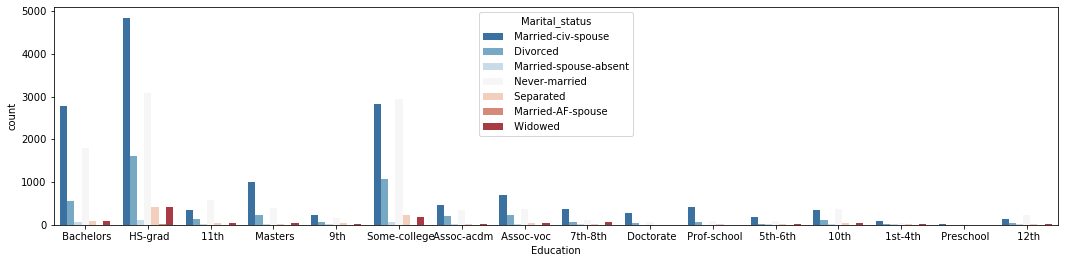

In [13]:
#Let's plot the counting of Education by Maritual Status
plt.figure(figsize=(18,4))
sns.countplot(x='Education', hue='Marital_status',data=df,palette='RdBu_r')

We can notice that Married and Divorced and Never Married are three kind of Maritual Status that can be noticed as the highest number of instances at least on education bachelor, HS grad and Same collegue.


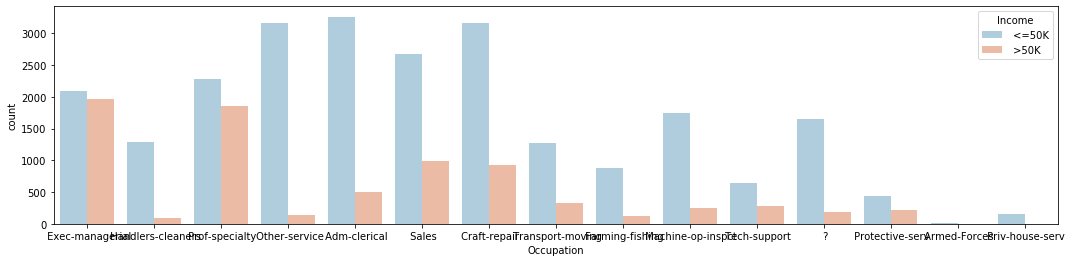

In [14]:
#Plotting and differenting the both kind of income against Ocupation feature:
plt.figure(figsize=(18,4))
sns.countplot(x='Occupation', hue='Income',data=df,palette='RdBu_r')


From the above plot, we can highlight that the salaries lower than 50k are more likely to happen, highlighted at least in Occupation Admin-clerical, Sales, Craft-repair, Transport, fishing, machine-op and highly noticeble the salary tradeoff difference in both sex in Other service.

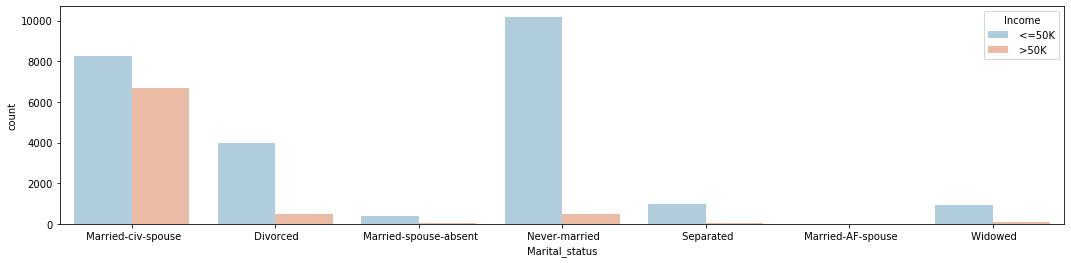

In [15]:
#let's plot Income by Maritual Status and check out what we encounter:
plt.figure(figsize=(18,4))
sns.countplot(x='Marital_status', hue='Income',data=df,palette='RdBu_r')


We can say never married , married and divorced  status has highest probaility in encountring a salary higher than 50k, eventhough not somany cases.
Maybe the reason, i guess, is that never married and divorced can concentrate fully and give their most of the energy to the work responsibilities.
And the reason, i guess, for the married ones is that these are forced to improve their work and salary conditions due to families responsibilities pressure.

Anyway, as we mentioned various previous plots, lower incomes are way more likely to be happen than high incomes.

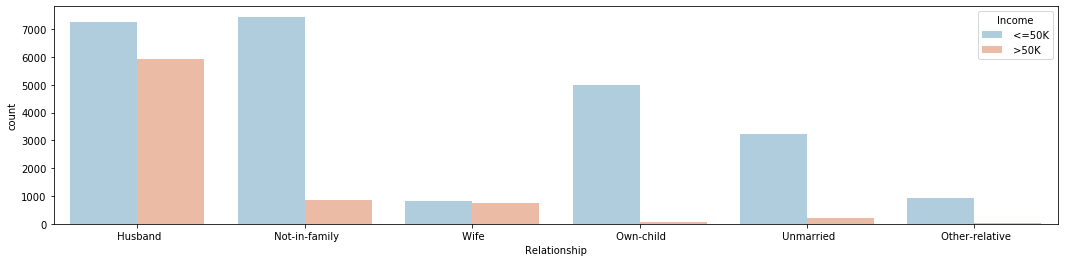

In [16]:
#now plotting the income by different kind of relationship
plt.figure(figsize=(18,4))
sns.countplot(x='Relationship', hue='Income',data=df,palette='RdBu_r')

We can mention that Husband and Not in fmly kind of relationhips has highest number of cases than other groups when checking for incomes lower than 50k.

All the groups has more probability to have income lower than 50k and we can highlight that employees Not in fmly or with Own child and unmarried group of relationship has higher difference in having the probability to have incomes higher or lower than 50k.

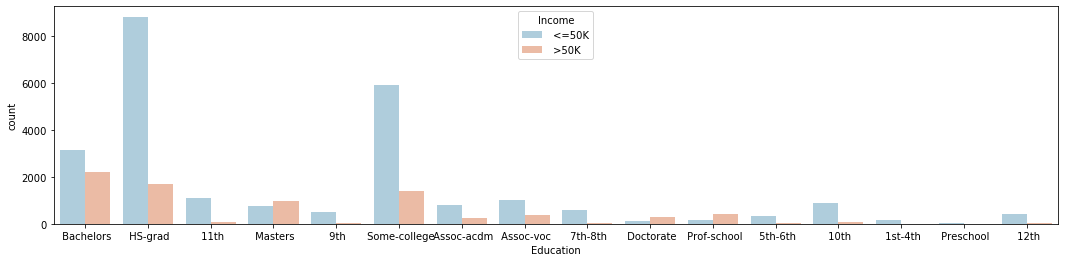

In [17]:
#Let's check Income by Education
plt.figure(figsize=(18,4))
sns.countplot(x='Education', hue='Income',data=df,palette='RdBu_r')

We will only highlight that HSgrad and some college have way more probability to have incomes lower than 50k. And these 2 groups are the most highlighted as they have the highest differnce between higher and lower salaries.


In [18]:
#finding how many high and low incomes we have in each Native country:
com_prim=df.groupby('Native_country')['Income'].value_counts() 
com_prim

Native_country  Income
 ?               <=50K     437
                 >50K      146
 Cambodia        <=50K      12
                 >50K        7
 Canada          <=50K      82
                          ... 
 United-States   >50K     7171
 Vietnam         <=50K      62
                 >50K        5
 Yugoslavia      <=50K      10
                 >50K        6
Name: Income, Length: 82, dtype: int64

In [19]:
df.nunique() #chekcing unique values just to remind myself the current counts of the unique values of each column.

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

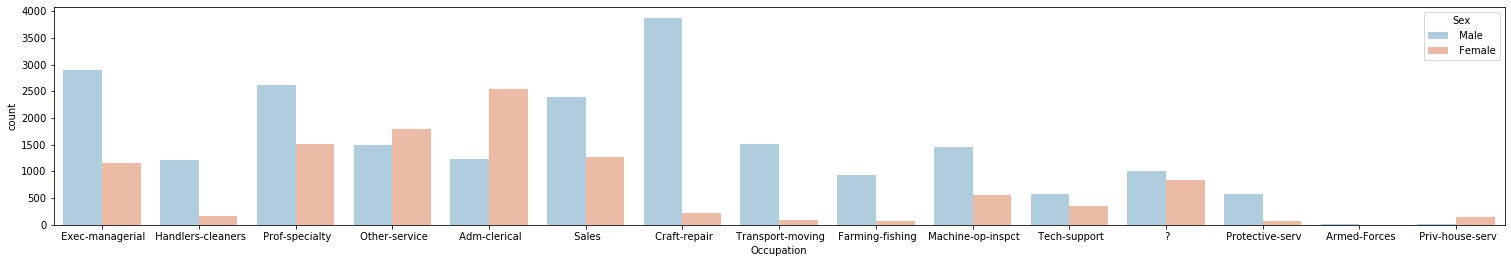

In [20]:
#plotting the Occupation by Sex

plt.figure(figsize=(26,4))
sns.countplot(x='Occupation',hue='Sex',data=df,palette='RdBu_r')

As we said, here we can see the occupation names clearly, so the analysis would not change : Executive manager, Handlers clearners, prof-speciality, sales, craft-repair, transport moving occupation, farming-fishing, machine-op-inspect are the occupations where males has higher probability to have these ocupations more than females.

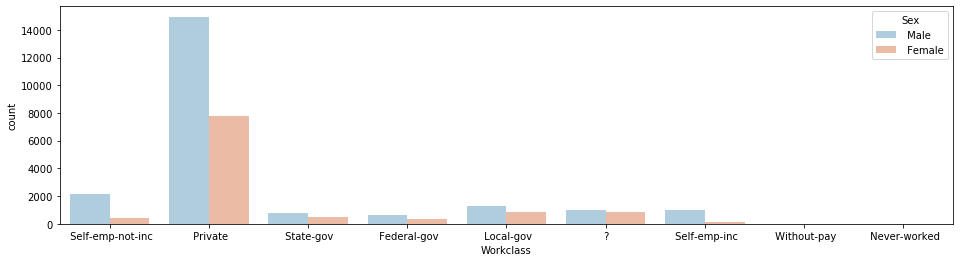

In [21]:
#plotting the Work classes y Sex:

plt.figure(figsize=(16,4))
sns.countplot(x='Workclass',hue='Sex',data=df,palette='RdBu_r')

We find the Private workclass has the highest number of both kind of incomes.

So if we focus on the private sector, we see the general rule being implemented: Males are more likely to have private work class than females. The same happens with all other work classes including self employed not inc.


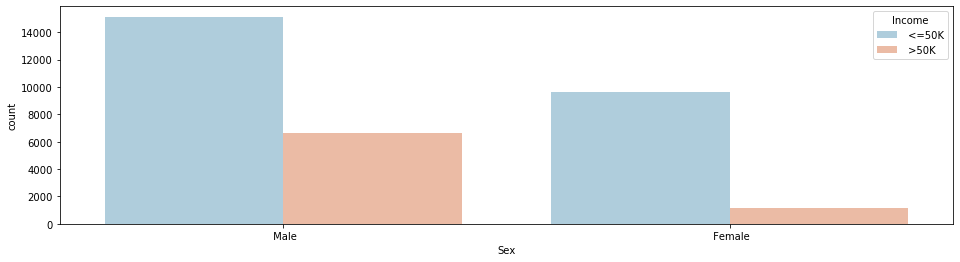

In [22]:
#plotting the number of Incomes by Sex
plt.figure(figsize=(16,4))
sns.countplot(x='Sex',hue='Income',data=df,palette='RdBu_r')

As we already know about the differences between males and females incomes, we will only mention here is that incomes higher than 50k are more likely to be happening under the Mens position.

And in both sexes, we see that we have high number of incomes lower than 50k compared to incomes higher than 50k.

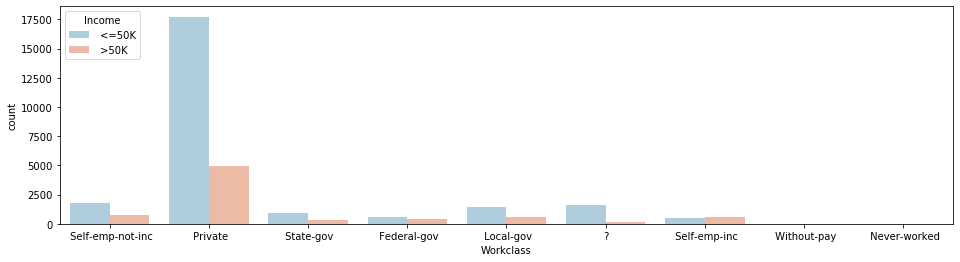

In [23]:
#here we are plotting the Income cases by workclass 

plt.figure(figsize=(16,4))
sns.countplot(x='Workclass',hue='Income',data=df,palette='RdBu_r')

Previously we commented the workclass by gender, now here we have the workclass by kind of income. So all we can highlight here is that, as we said previously, private has more cases in our income data.

And focusing on the private sector, we see that lower incomes are way higher to happen than the incomes higher than 50k as usual.

In [24]:
#finding how much type of avacado is sell in different year
com_prim=df.groupby('Marital_status')['Income'].value_counts() 
com_prim

Marital_status          Income
 Divorced                <=50K     3980
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8284
                         >50K      6692
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10191
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: Income, dtype: int64

Age                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
Fnlwgt            AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Education_num      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Capital_gain      AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Capital_loss      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Hours_per_week      AxesSubplot(0.125,0.518913;0.133621x0.16413)
dtype: object

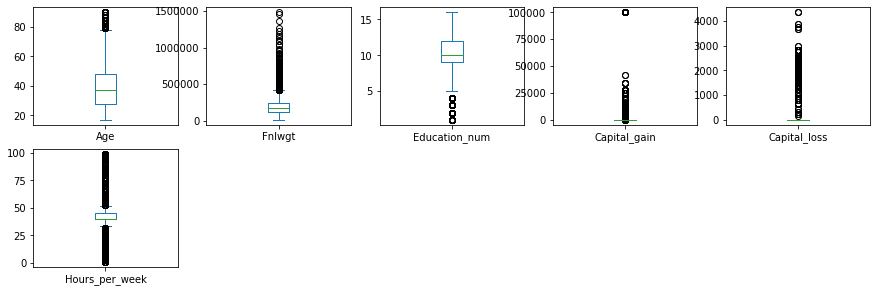

In [25]:
#plotting the boxplot for each column in order to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In the above boxplots we can notice that we have outliers in all 6 columns and have many outliers.

In [26]:

#Now let’s prepare the data for the model. 
#Transform categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
        if df[col].dtype == object:
            df[col] = LabelEncoder().fit_transform(df[col])

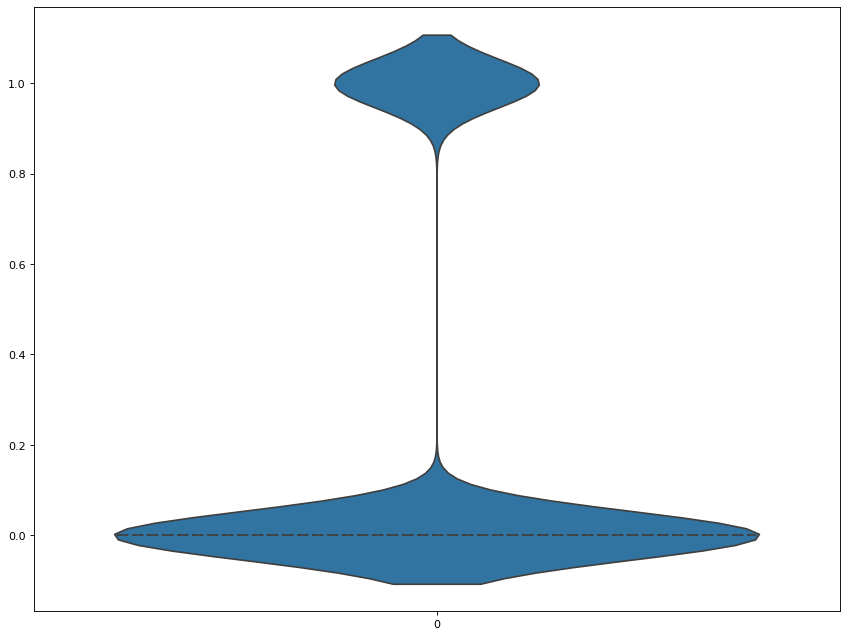

In [27]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=None, y=None, hue=None, data=df['Income'], scale='width', inner='quartile')

In the above violinplot, as we expect, we can see that lower incomes are way higher to happen than higher incomes.

In [28]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


As we can see in the count row, we can confirm there is no missing data as we said previously.

So, we also see that no columns has single unique value, which means we have data that can be helpful or not for our analysis.

Seems we have seweral columns with outliers but the highlighted ones are Age, Workclass, Education, Maritual Status, Occupation, Relationship. And Capital_gain and Capital_loss  are the festures that have the highest number of outliers as the maxnumber is way higher than 75% percentile.

Almost all the columns are positively skewed except Age, Fnlwgt, Education_num, Marital_status, Relationship, Hours_per_week, Income and the columns with highest positive skew are Capital_gain and Capital_loss. These columns are either negatively skewed, means medium is lesser than the mean, or almost normalized.

Furthermore, as we can see in the describe table, we have data in different scale, which means we need to standarize the data distribution/scaling.

And as we menitoned previously, our target income has inbalance data.

 

Age                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
Workclass          AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Fnlwgt              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Education          AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Education_num      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Marital_status       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Occupation        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Relationship       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Race              AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Sex               AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Capital_gain         AxesSubplot(0.125,0.321957;0.133621x0.16413)
Capital_loss      AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Hours_per_week     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Native_country    AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Income            AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: obj

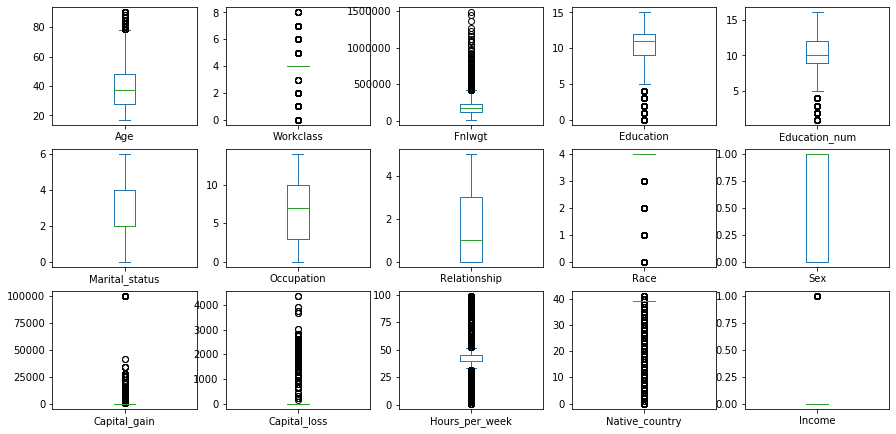

In [30]:
#plotting the boxplot for each column in order to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

As we already mentions, we have too many outliers. We have them in all our features.

In [32]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

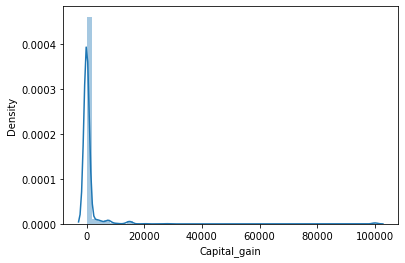

In [33]:
#let's plot the Capital Gain distribution
sns.distplot(df['Capital_gain'])

We see that the median is very near to 0, which meand values very near to 0 has higher probability to happen than values far away from 0.

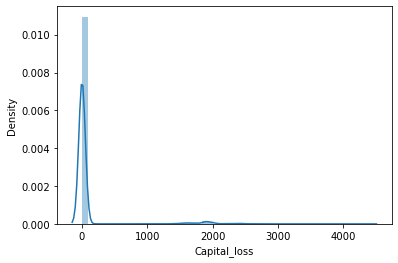

In [34]:
#let's plot the Capital Loss
sns.distplot(df['Capital_loss'])

With Capital loss happens similar-equal case as capital gain. Which means, Capital gain and loss are more likely to be neutrated.

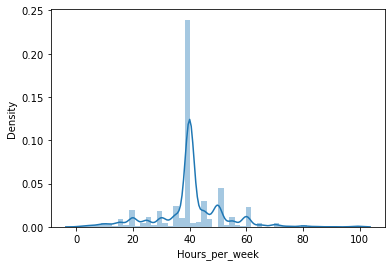

In [35]:
#let's plot the Hours per week
sns.distplot(df['Hours_per_week'])

As expected, 40 hours per week are mostly happening in almost all income cases.

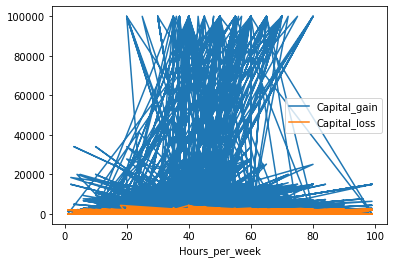

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(x="Hours_per_week", y =['Capital_gain','Capital_loss'])
plt.show()

Here we can mention that Capital Gain disperses as lower or higher it is.

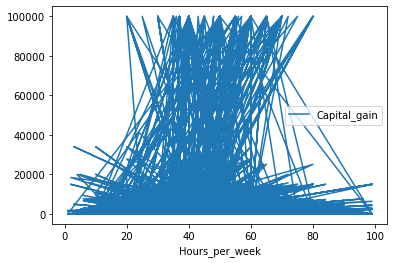

In [37]:
#let's plot capital gain separaty by  hours per week:
df.plot(x="Hours_per_week", y=["Capital_gain"])
plt.show()

We can notice what normally happens is that Capital gain has more incomes cases for 40 per week. Obvious as the 40h is the most frequest case in feature hours per week.

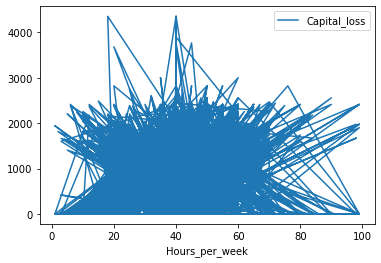

In [38]:
#let's plot capital loss separaty by  hours per week:

df.plot(x="Hours_per_week", y=["Capital_loss"])
plt.show()

In [ ]:
We can notice what normally happens is that Capital loss has more incomes cases between 0 and 80h per week. Here the finding are minimalist.
# Let's check capacity gain and loss per hour in a more efficient way!

Text(0.5, 1.0, 'Capacity gain per hours')

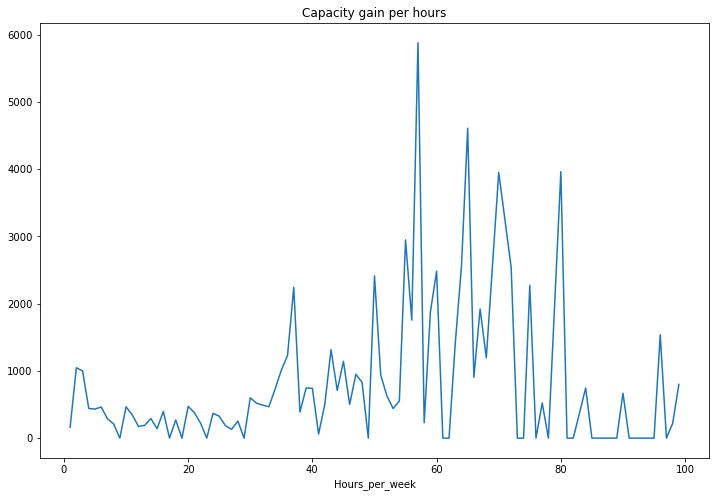

In [39]:
#plotting Capacity gain per hours 
byDate=df.groupby('Hours_per_week').mean()
plt.figure(figsize=(12,8))
byDate['Capital_gain'].plot()
plt.title('Capacity gain per hours') 

Here now that we see the linear plot, we can say the the peak of weekly hours is on around 59h per week.

Text(0.5, 1.0, 'Capacity loss per hours')

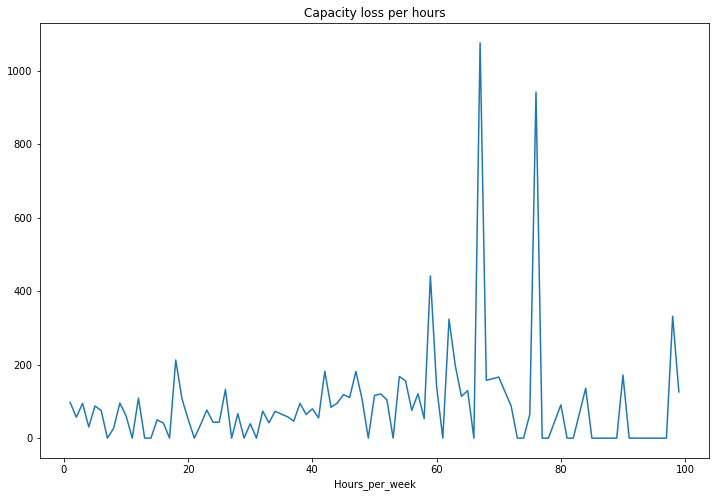

In [40]:
#plotting the Avocado's Average Price throughout the Date 
byDate=df.groupby('Hours_per_week').mean()
plt.figure(figsize=(12,8))
byDate['Capital_loss'].plot()
plt.title('Capacity loss per hours') 

Here now that we see the linear plot, we can say the the peak of weekly hours is on around 69h per week. But we also have another second highest peak which is on 79h hours per week.

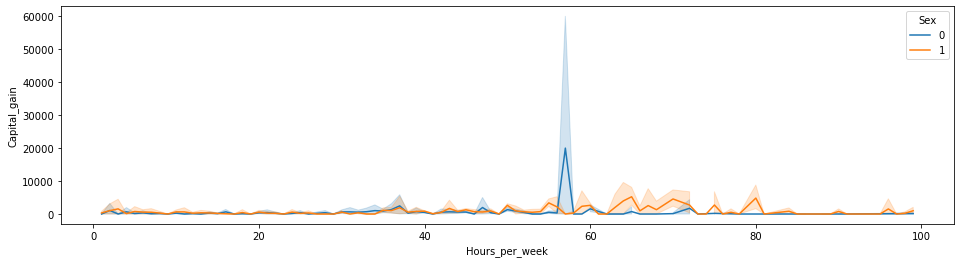

In [41]:
#plotting Capital gain over the weekly working hours by separating by sex:

plt.figure(figsize=(16,4))
sns.lineplot(x="Hours_per_week", y=('Capital_gain'), hue='Sex', data=df)
plt.show() #Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

As we mentioned, we have the highest peak on around 59 wourking hours where have most of the capital gain cases.

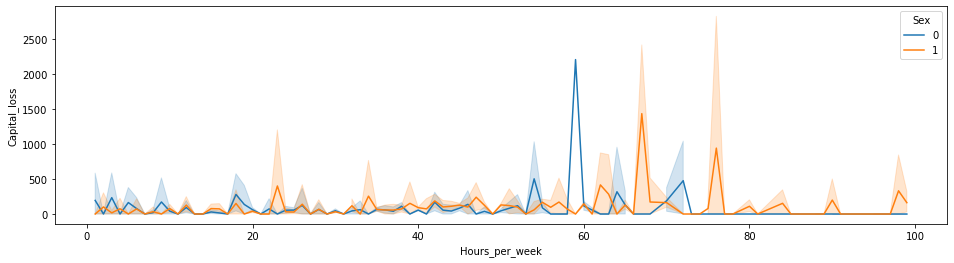

In [42]:
#plotting Average price over the months by separating Conventional and Organic Types:

plt.figure(figsize=(16,4))
sns.lineplot(x="Hours_per_week", y=('Capital_loss'), hue='Sex', data=df)
plt.show() #Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

Here we have the highest 3 peak on around 59, 69 an 76 working hours where have most of the capital loss cases.

In [43]:
#let's check Capital gain values:
print(len(df["Capital_gain"].value_counts()))
(df["Capital_gain"].sort_values(ascending=False)).unique() #habla de 3max y 3min

119


array([99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481,
       15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605, 10566,
       10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,  7430,
        7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,  6097,
        5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,  4865,
        4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,  3942,
        3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,  3432,
        3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,  2964,
        2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,  2580,
        2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,  2290,
        2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,  2009,
        1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,  1409,
        1173,  1151,  1111,  1086,  1055,   991,   914,   594,   401,
         114,     0])

What we can mention here is that the maximum value of capital gain is 99.999. Ans the following highest values are 41.310 and 34.095. 

And we can also mention that the lowest capital gain values are 0, 114 and 401 respectively.

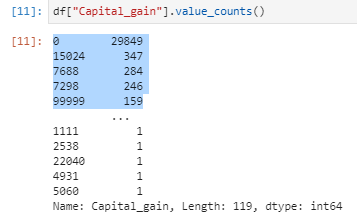

As we can see in the above picture, we have  value 0 that is being the most frequent value in our capital gain feature with total of 29.849 cases of no capital gain.


In [44]:
print(len(df["Capital_loss"].value_counts()))
(df["Capital_loss"].sort_values(ascending=False)).unique() #habla de 3max y 3min

92


array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0])

What we can mention here is that the maximum value of capital loss is 4356. Ans the following highest values are 3900 and 3770. 

And we can also mention that the lowest capital loss values are 0, 155 and 213 respectively.

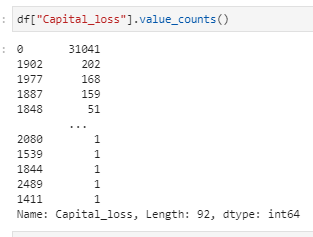

As we can see in the above picture, we have  value 0 that is being the most frequent value in our capital loss feature with total of 31.041 cases of neither capital gain nor capital loss.


In [45]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [46]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


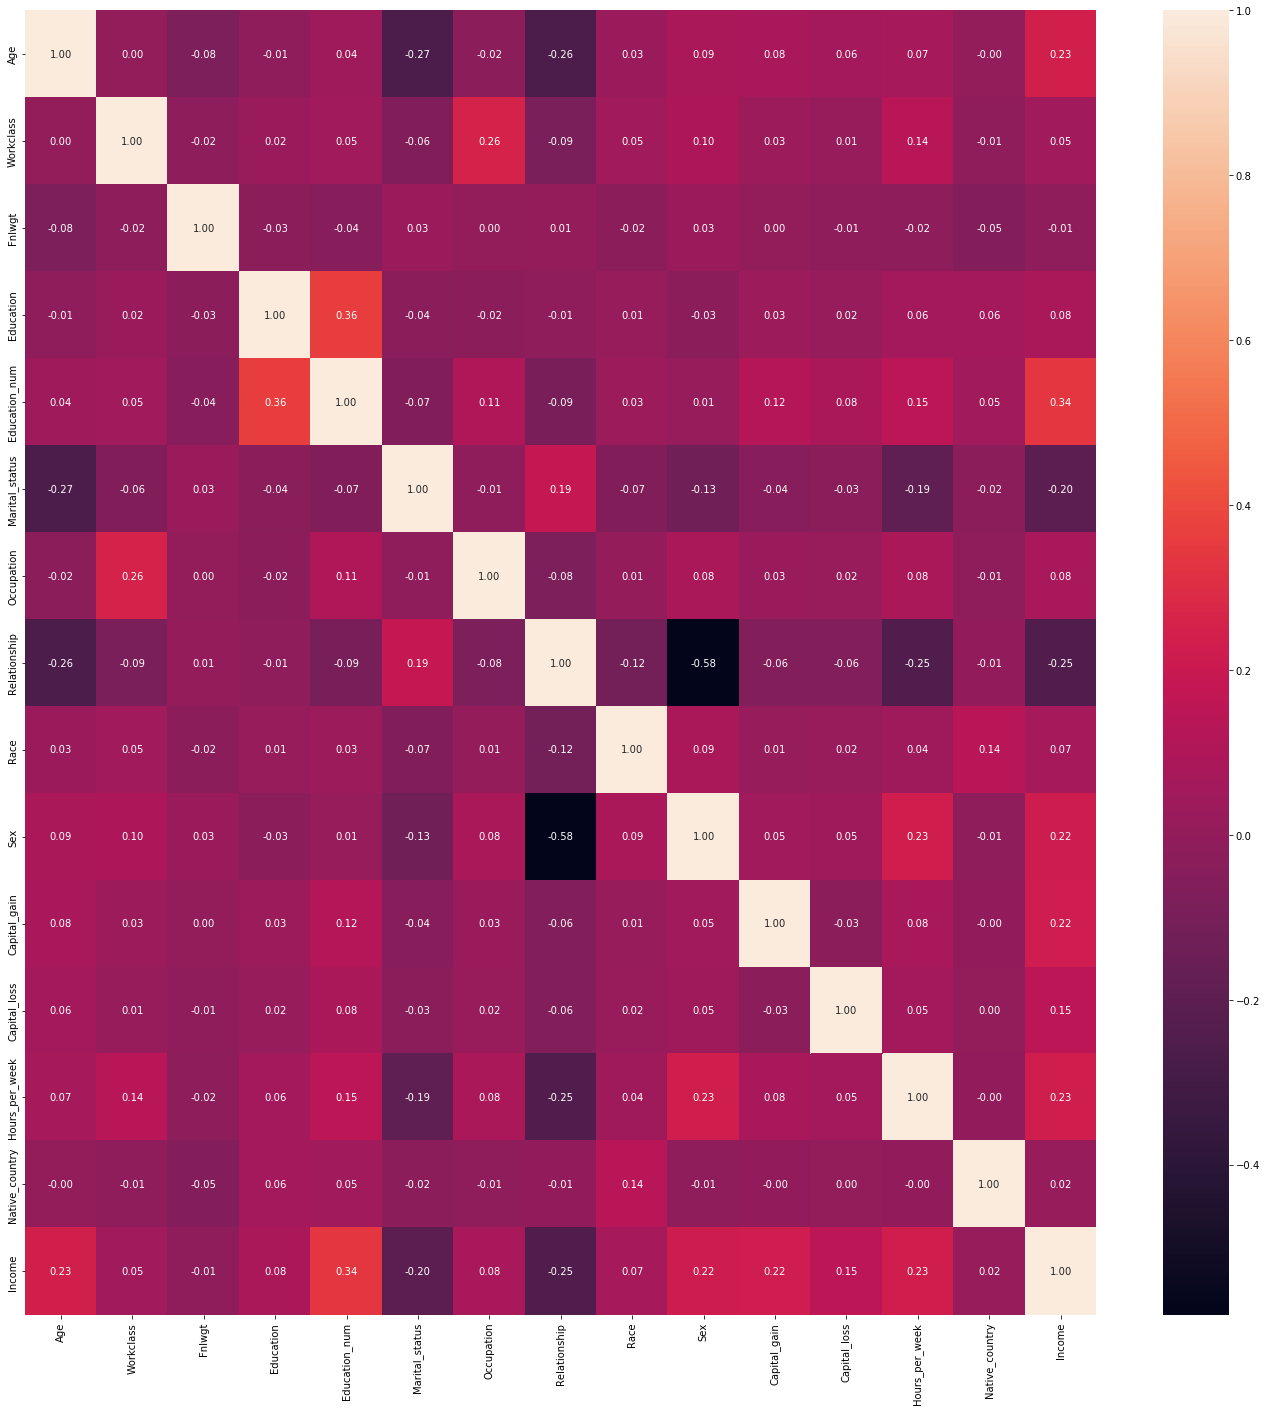

In [47]:

#Get the correlation of the columns
df.corr()
#Visualize the correlation
plt.figure(figsize=(24,24))  
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In above Heatmap or corelation map tells how the features are linked to each other.

First of all, If we check our target column, we see the features most correlated with it are Hours per week, Capital gain and loss, Sex, Relationship (family condition status like own child, if husband or wife, if lives in family or not, etc) , Maritual Status (if married or divorced, among others), Education_Num and Age.

We also can highlight that Education Number is highly correlated with Education Type. Maybe we need to think about dropping out the Education Number as this is just an Id and it is very correlated wit Education feature. 

Then we also have a noticable correlation of Occupation with Workclass.

And if we check negative correlation within our features excluding our target variable, we need to mention and highlight that in the number one position it would be Sex correlation with Relationship. And including target, we can also say the Relationship has inverse correlation with our target.


In [48]:
#Let's define and separate the numerical and categorical features
'''Numerical Features and Categorical Features'''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [49]:
#as we saw the data is a bit skewed, we will check and study skewness of our data
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [50]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
10,Capital_gain,11.953139
11,Capital_loss,4.594337
2,Fnlwgt,1.446906
14,Income,1.212327
7,Relationship,0.786747
0,Age,0.558712
12,Hours_per_week,0.227625
6,Occupation,0.114534
5,Marital_status,-0.013447
4,Education_num,-0.311616


In [51]:
df_skw=df.skew()
df_skw.sort_values(ascending = False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Income             1.212383
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Workclass         -0.752280
Education         -0.934063
Race              -2.435332
Native_country    -3.658235
dtype: float64

In [52]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(32560, 15)

In [53]:
threhold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552]), array([13, 12,  8, ...,  8,  8,  8]))


In [54]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32560, 15)
(27417, 15)


In [55]:
#After, removing the outlier’s final there are 27417 and 15 column presents in the data set.

#Percentage of data loss:
loss_perc=(32560-27417)/32560*100
loss_perc #since the loss > 10%, so we can't proceed with removing the outliers.

15.795454545454547

In [56]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape
threhold=4
print(np.where(z>4))
df_new=df[(z<4).all(axis=1)]
print(df.shape)
print(df_new.shape)

(array([    3,    13,    14, ..., 32524, 32530, 32550]), array([13, 13,  8, ..., 13, 12,  8]))
(32560, 15)
(29813, 15)


In [57]:
#After, removing the outlier’s final there are 29813 and 15 column presents in the data set.

#Percentage of data loss:
loss_perc=(32560-29813)/32560*100
loss_perc #since the loss < 10%, so we can proceed with removing the outliers.

8.436732186732186

In [58]:
#skewness of dataframe after removing outliers
df_new.skew().sort_values(ascending=False)

Capital_loss      9.142411
Capital_gain      5.486593
Income            1.325470
Fnlwgt            0.827452
Relationship      0.754205
Age               0.572113
Occupation        0.125501
Marital_status   -0.041380
Hours_per_week   -0.153363
Education_num    -0.320111
Sex              -0.685742
Workclass        -0.751895
Education        -0.932218
Race             -2.419071
Native_country   -4.474261
dtype: float64

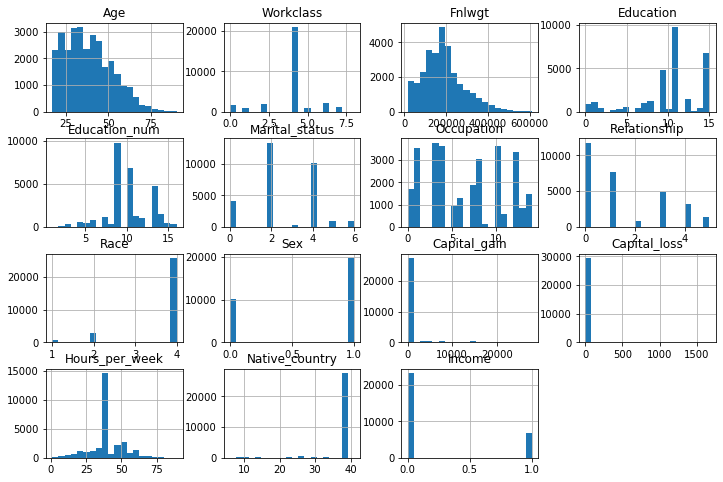

In [59]:
# We still see skewness.
#Distributions of the variables/features.
df_new.hist(figsize=(12,8),bins=20)
plt.show()
#As we said, we have a  skewness that we need to get rid of.

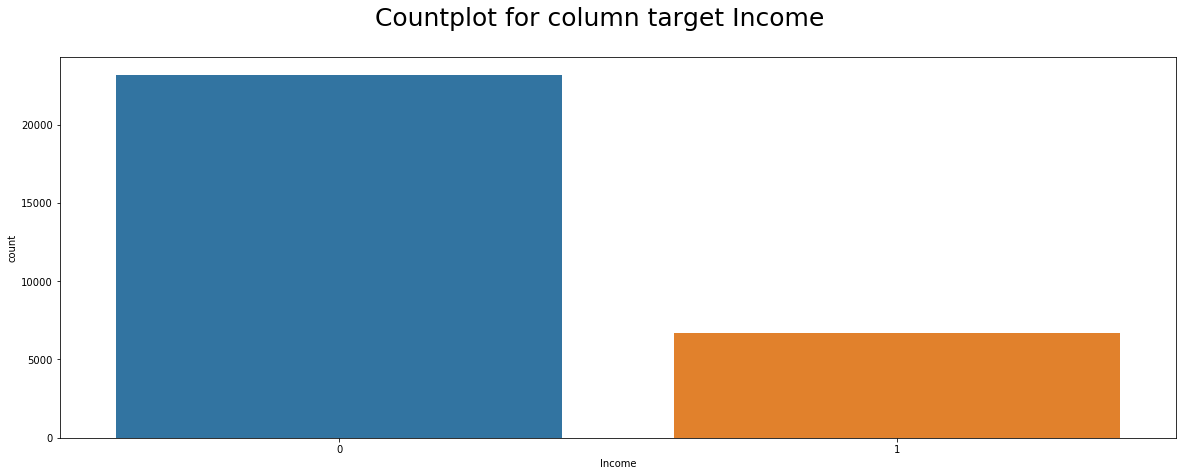

In [60]:
## Countplot for categorical variables
fig, (ax1) = plt.subplots(1,1,figsize=(20,7))

fig.suptitle("Countplot for column target Income", fontsize=25)

sns.countplot(x="Income", data=df_new,ax=ax1)

In [61]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Capital_loss','Capital_gain','Income','Race', 'Native_country')
for col in skew :
    if df_new.skew().loc[col]>0.55 or df_new.skew().loc[col]<(-0.55) :
        df_new[col] = np.log1p(df_new[col])

In [62]:
#skewness of modified dataframe
df_new.skew().sort_values(ascending=False)


Capital_loss      8.800868
Capital_gain      3.110129
Income            1.325470
Fnlwgt            0.827452
Relationship      0.754205
Age               0.572113
Occupation        0.125501
Marital_status   -0.041380
Hours_per_week   -0.153363
Education_num    -0.320111
Sex              -0.685742
Workclass        -0.751895
Education        -0.932218
Race             -2.675559
Native_country   -5.536980
dtype: float64

Still we have some columns with skewness that are not near to zero. We will clear skewness after having split our data for trainig. Making the skewness value near to zero will help to get better score. But we will handle the remaining skkewness later.

As of now, let's check multicolinearity first via VIF.

In [63]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
 vif = dict()
 vif["FeatureColumns"] = Data.columns
 vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
 return(pd.DataFrame(vif))

In [64]:
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)


,FeatureColumns,VIF
13,Native_country,101.105514
8,Race,52.290179
4,Education_num,21.883475
12,Hours_per_week,14.029251
0,Age,10.080298
3,Education,9.275107
1,Workclass,8.712094
9,Sex,4.549416
2,Fnlwgt,4.530829
5,Marital_status,4.388765


As we commented earlier, we have high multicolinearity in our data. Now, let's drop one by one features of our data by its high multicolinearity rate so that we can reduce the high multicolinearity in our data:

In [65]:
df=df_new.drop(['Native_country'],axis=1)
CalculateVIF(df).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
8,Race,31.059941
4,Education_num,19.965305
12,Hours_per_week,13.264588
3,Education,9.135667
0,Age,8.805167
1,Workclass,8.552092
9,Sex,4.403189
2,Fnlwgt,4.398466
5,Marital_status,4.098986
6,Occupation,3.677909


In [66]:
df=df.drop(['Race'],axis=1)
CalculateVIF(df).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
4,Education_num,18.437699
11,Hours_per_week,12.253662
3,Education,9.003623
1,Workclass,8.238099
0,Age,7.579622
2,Fnlwgt,4.280174
8,Sex,4.161296
5,Marital_status,3.890955
6,Occupation,3.670839
7,Relationship,2.531363


In [67]:
df=df.drop(['Education_num'],axis=1)
CalculateVIF(df).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
10,Hours_per_week,11.390049
1,Workclass,8.129411
0,Age,7.233843
3,Education,7.046360
2,Fnlwgt,4.252782
7,Sex,4.155003
4,Marital_status,3.758254
5,Occupation,3.596949
6,Relationship,2.485406
11,Income,1.595080


In [68]:
# we stop deleting more variables as it decreases the regressor score and right now it do not have high multicolinearity. Good!
#Split the data into independent 'X' and dependent 'Y' variables
xx = df.drop('Income', axis=1)
X=xx.values 
Y = df['Income']
print(X.shape)
Y.shape #income_category


(29813, 11)


(29813,)

In [69]:
Y.dtype

dtype('float64')

In [70]:
Y=Y.astype('str')

In [71]:
df.drop('Income', axis=1).columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [72]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [73]:
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=xx.columns)

In [74]:
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.905932,1.651717,-1.110791,-0.474414,-0.391543,-0.489603,-1.111677,0.714288,-0.297494,-0.11256,-2.182160
1,0.125201,0.017669,0.401805,0.089773,-1.767450,-0.001182,0.101106,0.714288,-0.297494,-0.11256,-0.029197
2,1.075806,0.017669,0.573762,-2.059265,-0.391543,-0.001182,-1.111677,0.714288,-0.297494,-0.11256,-0.029197
3,0.051031,0.017669,0.991986,0.392504,-0.391543,-0.489603,1.552341,-1.399996,-0.297494,-0.11256,-0.029197
4,0.847370,0.017669,-0.148189,-1.208073,0.262680,0.435517,0.101106,-1.399996,-0.297494,-0.11256,-1.964143
...,...,...,...,...,...,...,...,...,...,...,...
29808,-0.802541,0.017669,0.768302,-0.979540,-0.391543,1.387549,1.552341,-1.399996,-0.297494,-0.11256,-0.200350
29809,0.268702,0.017669,-0.211171,0.089773,-0.391543,0.222440,-1.111677,0.714288,-0.297494,-0.11256,-0.029197
29810,1.341474,0.017669,-0.238234,0.089773,2.154590,-1.404985,1.345089,-1.399996,-0.297494,-0.11256,-0.029197
29811,-1.334800,0.017669,0.269086,0.089773,0.903306,-1.404985,1.074570,0.714288,-0.297494,-0.11256,-1.663094


In [75]:
#skewness of modified dataframe
x.skew().sort_values(ascending=False)


Capital_loss      8.772002
Capital_gain      3.064072
Hours_per_week    0.156357
Relationship      0.106586
Workclass         0.066583
Age              -0.012048
Fnlwgt           -0.016960
Marital_status   -0.125676
Occupation       -0.185127
Education        -0.315458
Sex              -0.685742
dtype: float64

In [76]:
#we still hv skew in 2 column bt okay

In [77]:

df.dtypes

Age                 int64
Workclass           int64
Fnlwgt              int64
Education           int64
Marital_status      int64
Occupation          int64
Relationship        int64
Sex                 int64
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Income            float64
dtype: object

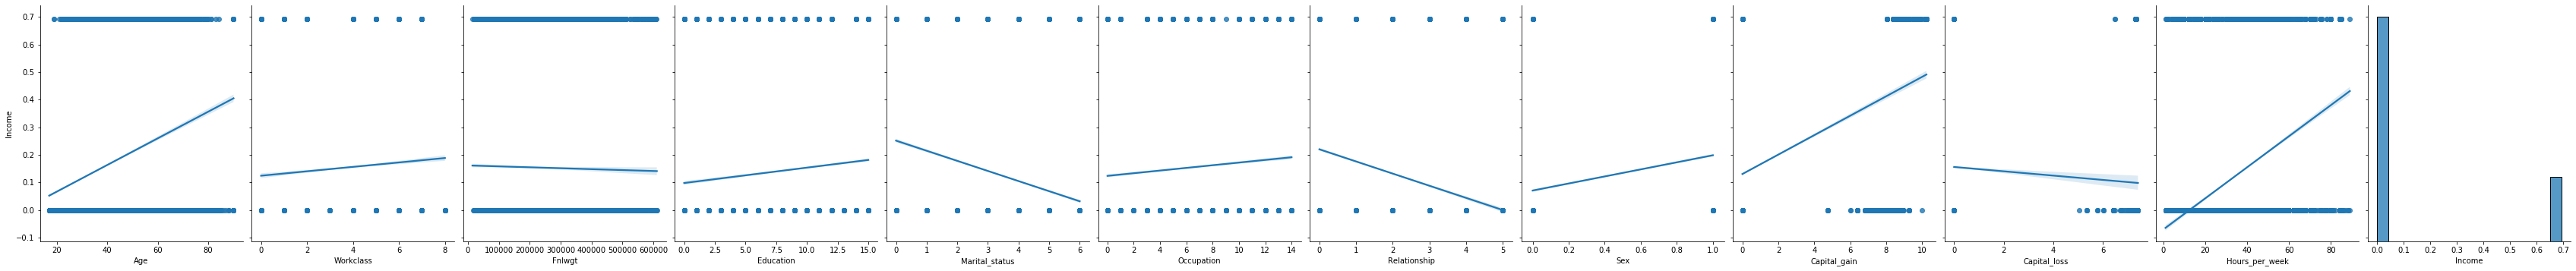

In [78]:
#chekcing regression line on few columns
sns.pairplot(df, x_vars=df.columns, y_vars=["Income"],
             height=5, aspect=.8, kind="reg");

As we may know at the initial stage, Regression wont work as this is a classification problem as we need to classify the income between income amount more than 50k or less  than 50k.

In [79]:
(x < 0).any()

Age               True
Workclass         True
Fnlwgt            True
Education         True
Marital_status    True
Occupation        True
Relationship      True
Sex               True
Capital_gain      True
Capital_loss      True
Hours_per_week    True
dtype: bool

As we may remember, we have an imbalanced data, which means we need to balance it in order to get the best results. Let's install and load SMOTE library!

In [80]:
!pip install imblearn


In [81]:
!pip install imbalanced-learn


In [82]:

# we will use SMOTE technique to Balance out the data
from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0,n_neighbors=4)
#smox, smoy = US.fit_transform(numpy.asarray(data), numpy.asarray(labels))
#oversampler=SMOTE(kind='regular',k_neighbors=2)
#xr, yr = SMOTE(k_neighbors=3).fit_resample(x, y)


In [83]:
#Now by using multiple Algorithms we are checking for the best algorithm which suits best for our data set 
#here we are checking the best accueracy having a corresponding random state and check the best algorithm that has the best accuracy:
model = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),MultinomialNB(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier()]
max_accuracy_score = 0
for r_state in range(59,67):
    train_xc,test_xc,train_yc,test_yc = train_test_split(abs(x),Y,random_state = r_state,test_size = 0.33)
    train_xc, train_yc = SMOTE(k_neighbors=3).fit_resample(train_xc, train_yc)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  59 is 0.7960158552698445
accuracy score correspond to random state  59 is 0.736558593352983
accuracy score correspond to random state  59 is 0.7174509604634617
accuracy score correspond to random state  59 is 0.7629840430938103
accuracy score correspond to random state  59 is 0.7405224108141071
accuracy score correspond to random state  59 is 0.819392214655961
accuracy score correspond to random state  59 is 0.8227462140461429
accuracy score correspond to random state  60 is 0.7939831283667039
accuracy score correspond to random state  60 is 0.7361520479723549
accuracy score correspond to random state  60 is 0.7189755056408171
accuracy score correspond to random state  60 is 0.7604431344648847
accuracy score correspond to random state  60 is 0.7347291391401565
accuracy score correspond to random state  60 is 0.808313853033845
accuracy score correspond to random state  60 is 0.8243723955686554
accuracy score correspond to random state  61 is 0.

In [84]:
#We got GBC as best classifier when random state is 60.
#now checking score of GBC with none random state None
GBC_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GBC_model.fit(train_xc,train_yc)
predc = GBC_model.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
GBC_model.score(test_xc, test_yc) #best_one_for_modeling and training

Accuracy Score : 81.05498526272996


0.8105498526272995

In [85]:
#now checking score of GBC with none random state 60
GBC_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=60, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


GBC_model.fit(train_xc,train_yc)
predc = GBC_model.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
scores = cross_val_score(GBC_model, train_xc, train_yc, cv=5)
scores=scores.mean()
print("CV Accuracy Mean Score :",scores*100)
GBC_model.score(test_xc, test_yc) #best_one_for_modeling and training


Accuracy Score : 81.05498526272996
CV Accuracy Mean Score : 85.33766208331089


0.8105498526272995

#Checking prediction of GradientBoostingClassifier Algorithm using GridSearchCV
GBC_grid = GradientBoostingClassifier()
parameters={'criterion':('friedman_mse', 'mse', 'mae') }
gridsearch_GBC=GridSearchCV(GBC_grid,parameters)
gridsearch_GBC.fit(train_xc,train_yc)
print(gridsearch_GBC.best_params_)
print(gridsearch_GBC.score(test_xc, test_yc))

In [86]:
#checking score of GBC with random state 60
GBC_model_2 = GradientBoostingClassifier(criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=60, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


GBC_model_2.fit(train_xc,train_yc)
predc = GBC_model_2.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
scores = cross_val_score(GBC_model_2, train_xc, train_yc, cv=5)
scores=scores.mean()
print("CV Accuracy Mean Score :",scores*100)
GBC_model.score(test_xc, test_yc) #best_one_for_modeling and training


Accuracy Score : 81.05498526272996
CV Accuracy Mean Score : 85.33766208331089


0.8105498526272995

In [87]:
accuracy = accuracy_score(test_yc,predc)
print('Accuracy of the best classifier is %.2f%%' % (accuracy*100))

Accuracy of the best classifier is 81.05%


In [88]:
#Let's try once again with AdaboostClassifier just to check if we previously got the best accuracy when comparing all the classifiers at once:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100)
clf.fit(train_xc,train_yc)
predc = clf.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
scores = cross_val_score(clf, train_xc, train_yc, cv=5)
scores=scores.mean()
print("CV Accuracy Mean Score :",scores*100)
clf.score(test_xc, test_yc)



Accuracy Score : 81.1871125114341
CV Accuracy Mean Score : 84.22094480627614


0.8118711251143409

Aas we see, we have a bit high accuracy but no sach difference. But, what we can also notice is the mean score of acurracy is lower than the previous one. So, we will keep the previous GBC results as it is reffered as the best algorithm when did the loop between all 6 best algorithms for classification.

In [89]:
#Tuning  prediction best parameters of GBC Algorithm using GridSearchCV
GBC = GradientBoostingClassifier()
parameters={'criterion' :('friedman_mse', 'mse'), 'n_estimators': (100,200,400,500) }
gridsearch=GridSearchCV(GBC,parameters)
gridsearch.fit(train_xc,train_yc)
print(gridsearch.best_params_)
print(gridsearch.score(test_xc, test_yc))

{'criterion': 'mse', 'n_estimators': 500}
0.8501880272385405


In [91]:

#checking score of GBC given the above best parameters:
clf = GradientBoostingClassifier(criterion='mse',loss='deviance',n_estimators=500).fit(train_xc, train_yc)

predc = clf.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
scores_acc = cross_val_score(clf, train_xc, train_yc, cv=5)
scores_acc=scores_acc.mean()
print("Accuracy Mean Scores: ",scores_acc*100)

clf.score(test_xc, test_yc)


Accuracy Score : 85.01880272385405
Accuracy Mean Scores:  88.94928229605259


0.8501880272385405

In [92]:
#Just try to check prediction of KNeighborsClassifier Algorithm using GridSearchCV eventhough i know it wont give better results than GBC as GBC is selected as the best algorithm for this and for the given parameters.
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30), 'weights': ('uniform', 'distance') }
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
print(gridsearch.best_params_)
print(gridsearch.score(test_xc, test_yc))

{'n_neighbors': 1, 'weights': 'uniform'}
0.75444659010062


In [94]:
#we see score of 0.75444 has not improved the best results of GBC. So, we will keep GBC.

#trying checking score of KNC if here we find any better results then previous ones eventhough i know it wont.
KNC_ = KNeighborsClassifier(n_neighbors=1, weights= 'uniform').fit(train_xc, train_yc)

predc = KNC_.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
scores_acc = cross_val_score(KNC_, train_xc, train_yc, cv=5)
scores_acc=scores_acc.mean()
print("Accuracy Mean Scores: ",scores_acc*100)

KNC_.score(test_xc, test_yc)


Accuracy Score : 75.444659010062
Accuracy Mean Scores:  88.80069210273032


0.75444659010062

In [99]:
#as we mentioned earlier GBC still has got the best accuracy and scores: 
#Accuracy Score : 85.01880272385405
#Accuracy Mean Scores:  88.94928229605259
#0.8501880272385405

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(abs(x),Y,test_size=0.2,random_state=42)

#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
pred=forest.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
#Now get the accuracy of the model on the training set.
sc_tr=forest.score(X_train, y_train)
print("Accuracy Train Score :",sc_tr*100)
#Now get the accuracy of the model on the test set.
sc_ts=forest.score(X_test, y_test)
print("Accuracy Test Score :",sc_ts*100)
scores_acc = cross_val_score(forest, X_train, y_train, cv=5)
print("Scores: ",scores_acc*100)
scores=scores.mean()
print("Accuracy Mean Score :",scores*100)


Accuracy Train Score : 98.60377358490567
Accuracy Test Score : 84.2193526748281
Scores:  [84.31865828 83.71069182 84.08805031 83.50104822 84.02515723]
Accuracy Mean Score : 84.22094480627614


In [ ]:

As the mean score is lower than GBC, we will keep GBC score as mean score 84.2209 of RFC is lower 
than GBC mean score which is 88.949.

So far, the best accuracy for cassification is 85.018% of GBC.

This looks much more realistic than before. Our model has a average accuracy of 85% with a standard deviation of 5 %. The standard deviation shows us, how precise the estimates are .
I think the accuracy is still really good and since GBC is an easy to use model.

Conclusion

Final model: Through the use of many different classification models, and tuning the best performing, my final model which is GBC, through which we have obtained an accuracy of 85.41%.

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way.

For further Evaluation, let's print confusion matrix:

In [100]:
#As we said the mean score is lower than GBC, we will keep GBC score as mean score 84.2209 of RFC is lower 
#than GBC mean score which is 88.949.
#Show the confusion matrix and accuracy for  the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
# View accuracy score
print(accuracy_score(y_test, forest.predict(X_test)))

print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
#The model correctly identified 86.41% of the employees that left the company.

[[4302  303]
 [ 638  720]]
0.8421935267482811
Model Testing Accuracy = "0.8421935267482811!"



In [104]:
#Let's do prediction through the RFC to check and contrast with our best algorithm GBC:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest, train_xc, train_yc, cv=3)

In [105]:
#Precision and Recall of RFC:

print("Precision Score : ",precision_score(train_yc, predictions, 
                                           pos_label='0.0'))
print("Recall Score : ",recall_score(train_yc, predictions, 
                                           pos_label='0.0'))

Precision Score :  0.8760126582278481
Recall Score :  0.893428866511748


In [106]:
#F1 Score of RFC:

from sklearn.metrics import f1_score
f1_score(train_yc, predictions,pos_label='0.0')

0.8846350504921385

In [107]:
#Now wew will study results of GBC and check and compare with RFC and analyze 
#if it really is the best algorithm. So it is. 
#But just comparing the results of best model GBC with RFC just to make sure we get the best results :)

clf

GradientBoostingClassifier(criterion='mse', n_estimators=500)

In [108]:
#Confusion Matrix for GBC:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, train_xc, train_yc, cv=3)
confusion_matrix(train_yc, predictions)

array([[14135,  1357],
       [ 3069, 12423]])

In [109]:
#Precision and Recall of GBC:

print("Precision Score : ",precision_score(train_yc, predictions, 
                                           pos_label='0.0'))
print("Recall Score : ",recall_score(train_yc, predictions, 
                                           pos_label='0.0'))

Precision Score :  0.821611253196931
Recall Score :  0.9124064033049316


Our model predicts 82.16% of the time the right income category. The recall tells us that it predicted that income category 91.24 % of the incomes who actually are from the predicted income category.

F-Score You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [110]:
# so, let's check F1 Score:
from sklearn.metrics import f1_score
f1_score(train_yc, predictions,pos_label='0.0')

0.8646317592366038

Dammm Good!!!

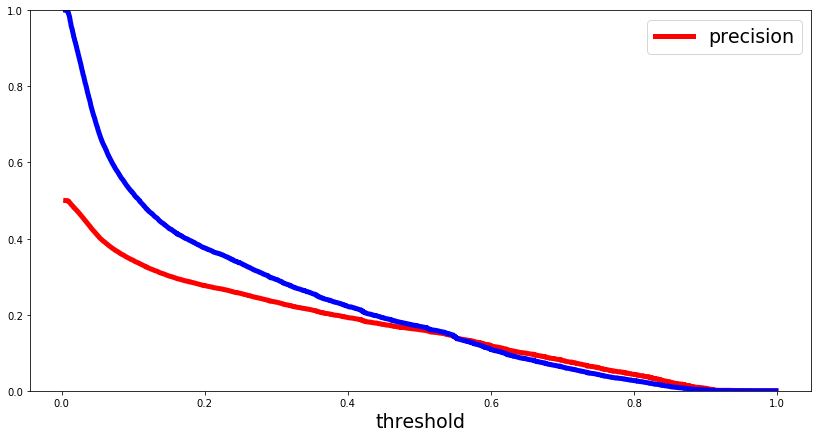

In [111]:
#let's plot Precision_recall_curve

from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = GBC_model.predict_proba(train_xc)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(train_yc, y_scores,pos_label='0.0')
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [113]:
#maybe we can study more models and train them in order to check if we get better results:
X_train,X_test,Y_train,Y_test=train_test_split(abs(x),Y,test_size=0.2,random_state=42)

from sklearn import linear_model
#Stochastic Gradient Descent (SGD):
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

print(sgd.score(X_train, Y_train))

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

0.759245283018868


75.92

In [114]:
#Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [115]:
#Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [116]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train,Y_train) * 100, 2)

In [117]:
#Gaussian Naive Bayes:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [118]:
#Perceptron:

from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [119]:
#Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [120]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [121]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
100.00,Random Forest
100.00,Decision Tree
88.47,KNN
79.92,Support Vector Machines
79.69,Logistic Regression
77.88,Naive Bayes
75.92,Stochastic Gradient Decent
68.22,Perceptron


In [122]:
#As we can see, the Random Forest classifier goes on the first place and then Decision Tree.

In [126]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "n_estimators": [100, 400]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 100}

In [128]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 5,criterion = 'entropy', random_state = 38)
forest.fit(X_train, Y_train)

pred=forest.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(Y_test,pred)
print("R2 Score :",r2_sc*100)
sc=forest.score(X_test, Y_test)
print("Accuracy Score :",sc*100)
scores_acc = cross_val_score(forest, X_train, Y_train, cv=5)
print("Scores: ",scores_acc*100)
scores=scores.mean()
print("Accuracy Mean Score :",scores*100)

R2 Score : 18.377635885947107
Accuracy Score : 85.64480965956733
Scores:  [86.26834382 85.34591195 85.55555556 85.42976939 85.639413  ]
Accuracy Mean Score : 84.22094480627614


So after checking all the classifier models we still will go with GBC_model which has best accuracy and CV mean scoring. 

In [133]:
#Confusion Matrix of GBC:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(GBC_model, train_xc, train_yc, cv=3)
confusion_matrix(train_yc, predictions)

array([[12915,  2577],
       [ 2054, 13438]])

In [134]:
#Precision and Recall of GBC:

print("Precision Score : ",precision_score(train_yc, predictions, 
                                           pos_label='0.0'))
print("Recall Score : ",recall_score(train_yc, predictions, 
                                           pos_label='0.0'))

Precision Score :  0.862783085042421
Recall Score :  0.8336560805577072


Our model predicts 86,27% of the time, a worker gets or not the high salary, higher than 50k (precision). The recall tells us that it predicted the income of 83.36 % of the people who actually got the high or low salary as predicted.


In [135]:
#checking F1 Score for GBC, good one!
from sklearn.metrics import f1_score
f1_score(train_yc, predictions,pos_label='0.0')

0.8479695348150094

We have a 84,79% of F-score. The score is not that high, because we have a recall of 83%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

ROC AUC Curve
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.
Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

ROC AUC Score
The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

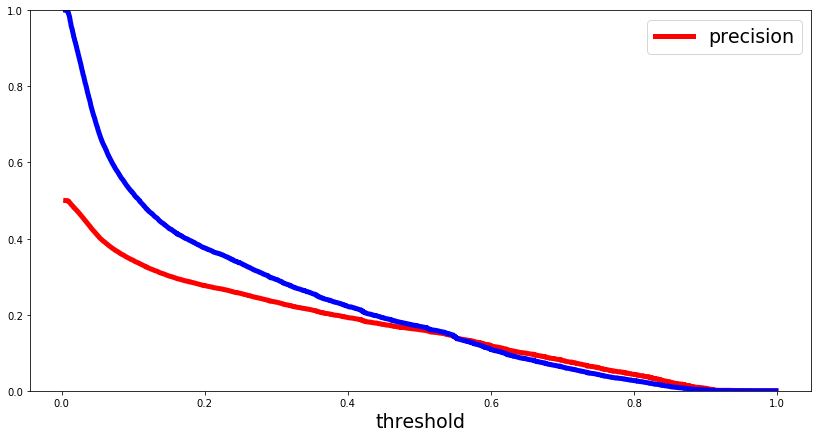

In [136]:
#So, let's check Precision recall curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = GBC_model.predict_proba(train_xc)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(train_yc, y_scores,pos_label='0.0')
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 83%. 

In [152]:
#So now, the only thing we need to check is ROC-AUC-Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(train_yc, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9422817630435044


ROC-AUC-Score is way good than my guess!

In [137]:
#Since we finally selected our best model GBC after having compared with all the best algorithms
#So, let's save the best model GBC as pickle:
import pickle
filename='GBC_clf.pkl'
pickle.dump(GBC_model,open(filename,'wb'))

In [140]:
#Results of saved model
import pickle
loaded_model=pickle.load(open('GBC_clf.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.816199899379507


OKAAAA!! Done!